In [107]:
import pandas as pd
model_csv = pd.read_csv("model_creation_data.csv")
pred_csv = pd.read_csv("model_prediction_data.csv")

In [108]:
print(len(model_csv))
model_csv.drop(columns="Unnamed: 0", inplace=True)
model_csv['EVs on the Road'] = np.log1p(model_csv['EVs on the Road'])
model_csv.tail()

1675


,zip_code,Estimate Male Total population AGE Under 5 years,Estimate Male Total population AGE 5 to 9 years,Estimate Male Total population AGE 10 to 14 years,Estimate Male Total population AGE 15 to 19 years,Estimate Male Total population AGE 20 to 24 years,Estimate Male Total population AGE 25 to 29 years,Estimate Male Total population AGE 30 to 34 years,Estimate Male Total population AGE 35 to 39 years,Estimate Male Total population AGE 40 to 44 years,...,Estimate Households Mean income (dollars),Estimate Families Total,Estimate Families Median income (dollars),Estimate Families Mean income (dollars),Estimate Married-couple families Total,Estimate Married-couple families Median income (dollars),Estimate Nonfamily households Total,Estimate Nonfamily households Median income (dollars),Estimate Nonfamily households Mean income (dollars),EVs on the Road
1670,14898,41.0,76.0,24.0,63.0,105.0,20.0,15.0,22.0,56.0,...,76715.0,397,59315.0,82616.0,310,84375.0,124,40769.0,47154.0,1.098612
1671,14901,308.0,504.0,476.0,685.0,436.0,624.0,613.0,532.0,561.0,...,52528.0,2743,47849.0,60616.0,1466,70658.0,2807,29564.0,42986.0,3.761200
1672,14903,229.0,163.0,127.0,242.0,102.0,229.0,194.0,191.0,157.0,...,99421.0,1751,80398.0,102963.0,1286,101630.0,1320,47727.0,90075.0,4.564348
1673,14904,312.0,256.0,423.0,460.0,561.0,386.0,788.0,563.0,494.0,...,71472.0,3411,74594.0,85962.0,2103,91635.0,3008,34360.0,50598.0,3.784190
1674,14905,238.0,222.0,328.0,276.0,128.0,282.0,276.0,238.0,260.0,...,96468.0,2494,94959.0,108763.0,1730,122829.0,1365,50481.0,70876.0,4.624973


In [109]:
print(len(pred_csv))
pred_csv.tail()

1785


,zip_code,Estimate Male Total population AGE Under 5 years,Estimate Male Total population AGE 5 to 9 years,Estimate Male Total population AGE 10 to 14 years,Estimate Male Total population AGE 15 to 19 years,Estimate Male Total population AGE 20 to 24 years,Estimate Male Total population AGE 25 to 29 years,Estimate Male Total population AGE 30 to 34 years,Estimate Male Total population AGE 35 to 39 years,Estimate Male Total population AGE 40 to 44 years,...,Estimate Households Median income (dollars),Estimate Households Mean income (dollars),Estimate Families Total,Estimate Families Median income (dollars),Estimate Families Mean income (dollars),Estimate Married-couple families Total,Estimate Married-couple families Median income (dollars),Estimate Nonfamily households Total,Estimate Nonfamily households Median income (dollars),Estimate Nonfamily households Mean income (dollars)
1780,6902,2170.0,1496.0,1616.0,1903.0,2678.0,4040.0,3205.0,2682.0,2257.0,...,92527.0,144706.0,17181,99756.0,154166.0,11020,125185.0,11211,77518.0,124359.0
1781,6903,284.0,451.0,254.0,367.0,505.0,335.0,169.0,372.0,271.0,...,203438.0,293056.0,4021,230524.0,319370.0,3714,236944.0,815,100678.0,156572.0
1782,6905,509.0,534.0,625.0,444.0,475.0,946.0,735.0,680.0,614.0,...,132730.0,166127.0,4782,144018.0,209597.0,3989,168831.0,3384,79464.0,102984.0
1783,6906,428.0,387.0,282.0,502.0,186.0,319.0,450.0,356.0,452.0,...,91710.0,130667.0,2389,92436.0,128272.0,1680,118611.0,1038,80724.0,121371.0
1784,6907,298.0,230.0,132.0,169.0,412.0,364.0,320.0,219.0,321.0,...,104526.0,143682.0,2629,121894.0,153458.0,1575,173429.0,896,82800.0,110348.0


# Linear Regression Train/Test

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

id_col = "zip_code"
target_col = "EVs on the Road"

X = model_csv.drop(columns=[id_col, target_col])
y = model_csv[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

# Test metrics
train_rsquare = linreg.score(X_train, y_train)
train_pred = linreg.predict(X_train)
train_rmse = mean_squared_error(y_train, train_pred) ** 0.5

test_rsquare = linreg.score(X_test, y_test)
test_pred = linreg.predict(X_test)
test_rmse = mean_squared_error(y_test, test_pred) ** 0.5

print("train r-square", train_rsquare)
print("train rmse", train_rmse)
print("test r-square", test_rsquare)
print("test rmse", test_rmse)

train r-square 0.7748012109574525
train rmse 0.8403316511146032
test r-square 0.6236705355625429
test rmse 1.0855818976741283


In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

labels = X_train.columns
importances = np.abs(linreg.coef_)
indices = np.argsort(importances)

top_ten_indices = indices[-10:]
importances[top_ten_indices]

array([ 2.65799212,  2.83641028,  3.62275017,  4.61010902,  4.63513523,
        4.90336039,  6.20227228,  8.92294491, 25.92816403, 29.93244359])

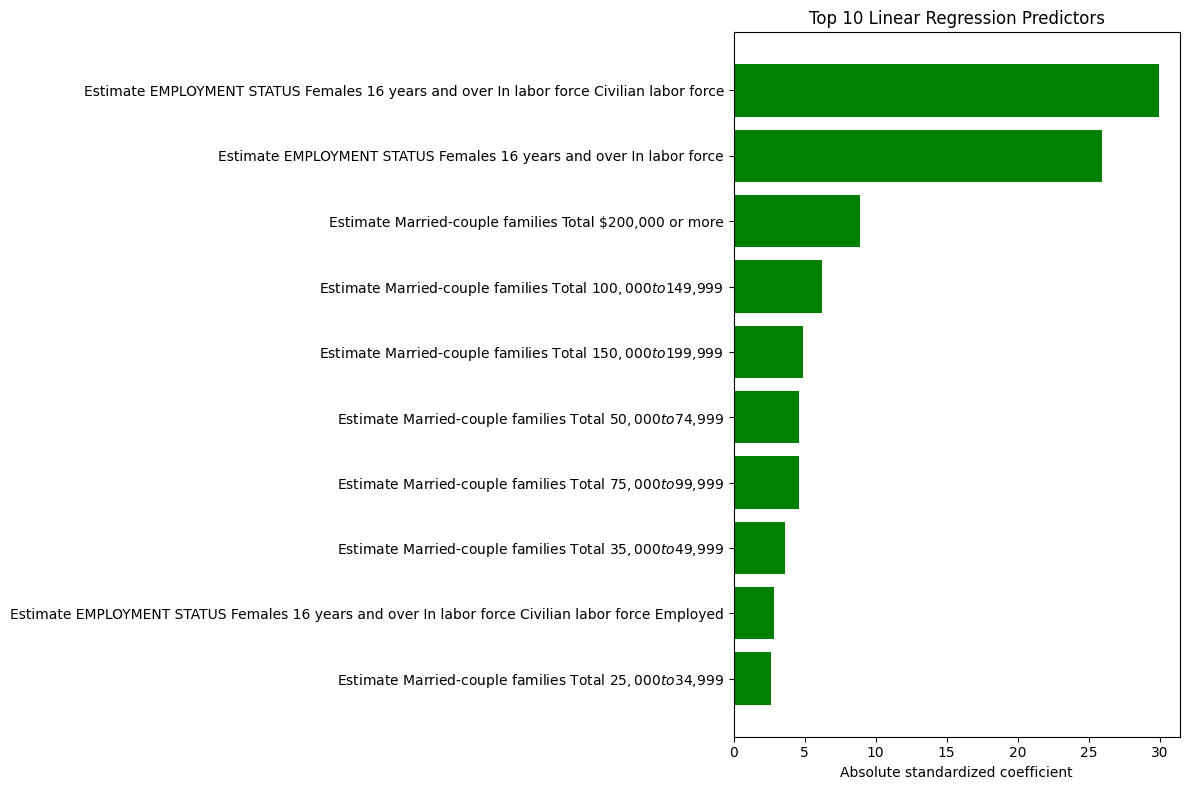

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.title('Top 10 Linear Regression Predictors')
plt.barh(range(len(top_ten_indices)),
         importances[top_ten_indices],
         color='g',
         align='center')
plt.yticks(range(len(top_ten_indices)), labels[top_ten_indices])
plt.xlabel('Absolute standardized coefficient')
plt.tight_layout()
plt.show()


# Linear Regression Cross Validation

In [113]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

linreg = LinearRegression()

# Define K-fold cross-validation
kf = KFold(n_splits=15, shuffle=True, random_state=42)

# RMSE scorer
rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=False
)

rmse_scores = cross_val_score(linreg, X, y, cv=kf, scoring=rmse_scorer)
r2_scores   = cross_val_score(linreg, X, y, cv=kf, scoring="r2")

print("CV RMSE (per fold):", -rmse_scores)
print("CV RMSE (mean):", -rmse_scores.mean())
print("CV R^2 (mean):", r2_scores.mean())


CV RMSE (per fold): [0.89356342 0.9163593  1.35370714 0.96617752 1.0391798  0.96669403
 0.89551205 0.96226358 0.88755434 1.05875427 0.93289497 0.97744005
 1.09538324 1.01254501 1.22699097]
CV RMSE (mean): 1.012334645660032
CV R^2 (mean): 0.6618610273448571


In [114]:
linreg.fit(X, y)

# Predict EV counts for prediction dataset
ev_pred = linreg.predict(X_pred)

# Attach predictions back to ZIP codes
pred_results = pd.DataFrame({
    id_col: zip_pred,
    "ev_predicted": ev_pred
})

pred_results.head()


,zip_code,ev_predicted
0,1001,4.373497
1,1002,6.385912
2,1003,2.967398
3,1005,3.350007
4,1007,4.711403


# Linear Regression Grid Search

In [115]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    StandardScaler(),
    Ridge()
)

param_grid = {
    "ridge__alpha": [0.01, 0.1, 1.0, 10.0, 100.0]  # strength of regularization
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid.fit(X, y)

print("Best params:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)
best_model = grid.best_estimator_
print(best_model)

Best params: {'ridge__alpha': 100.0}
Best CV RMSE: 1.0069681186675328
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=100.0))])


In [116]:
best_model.fit(X, y)
ev_pred = best_model.predict(X_pred)

pred_results = pd.DataFrame({
    id_col: zip_pred,
    "ev_predicted": ev_pred
})

In [117]:
pred_results

,zip_code,ev_predicted
0,1001,4.540180
1,1002,5.619676
2,1003,3.284761
3,1005,3.342974
4,1007,4.739838
...,...,...
1780,6902,9.531768
1781,6903,6.332045
1782,6905,5.876825
1783,6906,4.086558
